# Importy

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [2]:
file_artist = r'data\data_project\artists2.txt'
file_tracks = r'data\data_project\tracks2.txt'
file_pairs = r'data\data_project\pairs2.txt'
file_df_artist = r'C:\Users\aleks\OneDrive\Documents\SIECI_ZLOZONE\data\df\artist_df2.csv'
file_df_tracks = r'C:\Users\aleks\OneDrive\Documents\SIECI_ZLOZONE\data\df\track_df2.csv'

In [3]:
df_tracks = pd.read_csv(file_df_tracks, header=None)
df_tracks.columns = ['Tytuł', 'Popularność']
df_artist = pd.read_csv(file_df_artist, header=None)
df_artist.columns = ['Artysta', 'Obserwujący', 'Gatunek']
print(df_artist.shape, df_tracks.shape)
df_tracks.drop_duplicates(inplace=True)
df_artist.drop_duplicates(inplace=True)

(725, 3) (763, 2)


# Utwory 

In [4]:
# liczba utworów 
df_tracks.shape[0]

636

In [5]:
df_tracks.sort_values(by=['Popularność'], ascending=False).head(10)

,Tytuł,Popularność
535,The Sound of Silence - CYRIL Remix,82
18,KOCHASZ?,71
232,Lloret de Mar,70
29,CZEMU NIE ŚPISZ?,69
123,Róż,67
9,Wynalazek Filipa Golarza,67
481,Miłość jest ślepa,67
662,NDA,67
10,Falochrony,67
236,PO CO?,66


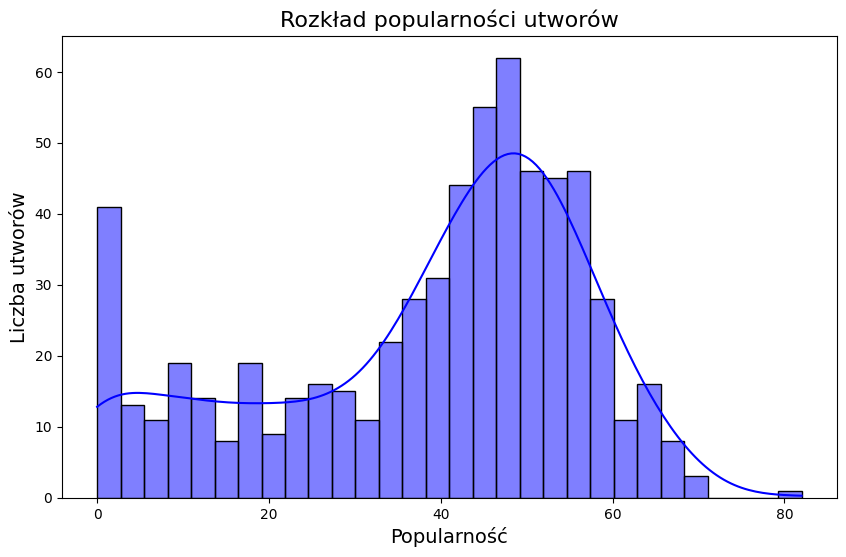

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df_tracks['Popularność'], bins=30, kde=True, color='blue')
plt.title('Rozkład popularności utworów', fontsize=16)
plt.xlabel('Popularność', fontsize=14)
plt.ylabel('Liczba utworów', fontsize=14)
plt.show()


# Artyści 

In [7]:
df_artist.shape[0]

415

In [8]:
df_artist.sort_values(by=['Obserwujący'], ascending=False).head(10)

,Artysta,Obserwujący,Gatunek
505,Lil Tjay,9806789,"['brooklyn drill', 'melodic rap', 'nyc rap', '..."
24,sanah,2881017,['polish pop']
31,Dawid Podsiadło,2219112,"['polish pop', 'talent show']"
26,Mata,2071000,"['polish hip hop', 'polish trap']"
49,Taco Hemingway,1657059,"['polish hip hop', 'polish trap']"
45,Bedoes 2115,1594860,"['polish hip hop', 'polish trap']"
51,Kizo,1398440,"['polish hip hop', 'polish trap']"
42,White 2115,1360716,"['polish hip hop', 'polish trap']"
202,Quebonafide,1331902,['polish hip hop']
23,Sobel,1250738,"['polish hip hop', 'polish trap']"


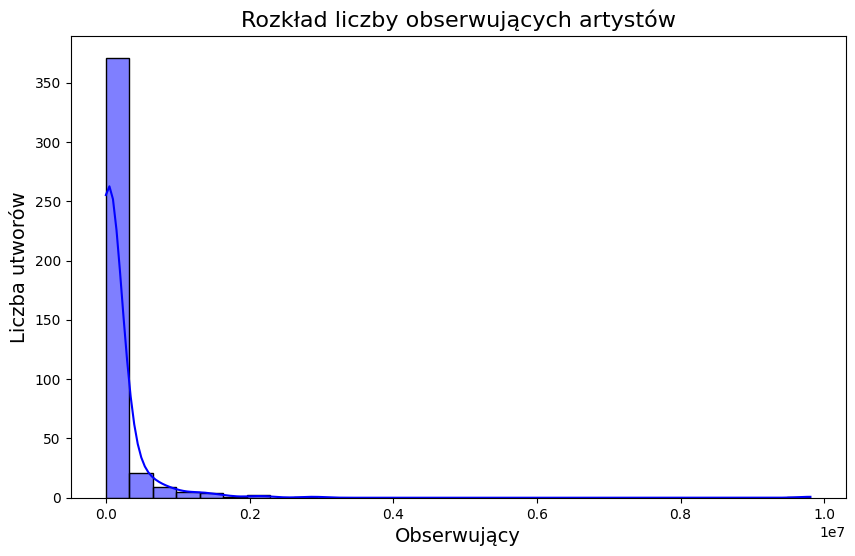

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df_artist['Obserwujący'], bins=30, kde=True, color='blue')
plt.title('Rozkład liczby obserwujących artystów', fontsize=16)
plt.xlabel('Obserwujący', fontsize=14)
plt.ylabel('Liczba utworów', fontsize=14)
plt.show()

In [10]:
df_artist['Gatunek'].value_counts()

Gatunek
[]                                    131
['polish pop']                         51
['polish hip hop']                     50
['polish hip hop', 'polish trap']      29
['polish alternative']                 21
                                     ... 
['poezja spiewana', 'sung poetry']      1
['polish pop', 'rusyn folk']            1
['czech pop', 'polish pop']             1
['polish pop', 'vintage broadway']      1
['koledy', 'polish pop']                1
Name: count, Length: 71, dtype: int64

In [11]:
# zmiana ostatniej kolumny w listę aby później rozdzielić gatunki 
df_artist['Gatunek'] = df_artist['Gatunek'].apply(ast.literal_eval)

C:\Users\aleks\AppData\Local\Temp\ipykernel_16784\3151515825.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Liczba artystów', y='Gatunek', data=genre_counts, palette='viridis')


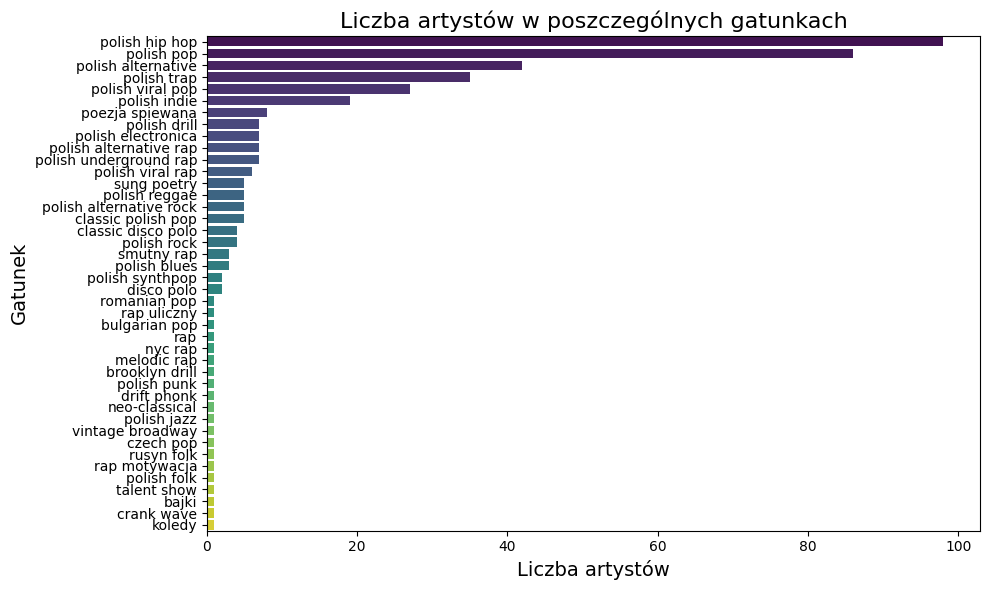

In [12]:
df_exploded = df_artist.explode('Gatunek')

genre_counts = df_exploded['Gatunek'].value_counts().reset_index()
genre_counts.columns = ['Gatunek', 'Liczba artystów']

plt.figure(figsize=(10, 6))
sns.barplot(x='Liczba artystów', y='Gatunek', data=genre_counts, palette='viridis')
plt.title('Liczba artystów w poszczególnych gatunkach', fontsize=16)
plt.xlabel('Liczba artystów', fontsize=14)
plt.ylabel('Gatunek', fontsize=14)
plt.tight_layout()
plt.show()

In [13]:
df = pd.read_csv(file_pairs, delimiter=';', header=None)
df.columns = ['Tytuł', 'Artysta']

In [14]:
df.shape[0]

1326

In [15]:
new_df = df.merge(df_tracks, on='Tytuł')

In [16]:
new_df

,Tytuł,Artysta,Popularność
0,Lato 2023,Nosowska,39
1,Ale jazz!,Vito Bambino,54
2,Ale jazz!,Vito Bambino,49
3,Pamięć do złych słów,Daria ze Śląska,49
4,Za krótki sen,Dawid Podsiadło,46
...,...,...,...
1456,Układ,Artur Rojek,22
1457,przez palce,Senny,19
1458,A miało być jak we śnie (feat. Taco Hemingway),Taco Hemingway,37
1459,SUPRO,Daria Zawiałow,44
